In [55]:
import numpy
import pandas
import pandas as pd
import csv
import os

In [56]:
tr_path = 'C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/train.csv'  # path to training data
train_df = pd.read_csv(tr_path)

tt_path = 'C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/test.csv'   # path to testing data
test_df = pd.read_csv(tt_path)

In [57]:
!nvidia-smi

Fri May  3 23:02:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.92                 Driver Version: 545.92       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   45C    P8              18W / 170W |   1581MiB / 12288MiB |      7%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [58]:
train_df

,node1,node2,label
0,29237,16563,1
1,32869,24548,0
2,48837,17831,1
3,31387,44509,0
4,15102,10271,1
...,...,...,...
31995,51510,44952,1
31996,30089,48199,0
31997,1418,13815,0
31998,5451,24600,1


In [59]:
test_df

,idx,node1,node2
0,0,5416,45023
1,1,6681,40749
2,2,44162,40953
3,3,51387,51233
4,4,6498,24093
...,...,...,...
7995,7995,15213,5972
7996,7996,30870,8448
7997,7997,5409,49118
7998,7998,14298,45426


In [60]:
x = train_df.drop(['label'], axis = 1)
x

,node1,node2
0,29237,16563
1,32869,24548
2,48837,17831
3,31387,44509
4,15102,10271
...,...,...
31995,51510,44952
31996,30089,48199
31997,1418,13815
31998,5451,24600


In [61]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [62]:
#split train dev dataset
from sklearn.model_selection import train_test_split
y = train_df['label']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)
#X_train, X_dev, y_train, y_dev = train_test_split(X, y,test_size=0.2,random_state=0)

In [63]:
x_test = test_df.drop(['idx'], axis = 1)
x_test

,node1,node2
0,5416,45023
1,6681,40749
2,44162,40953
3,51387,51233
4,6498,24093
...,...,...
7995,15213,5972
7996,30870,8448
7997,5409,49118
7998,14298,45426


## SVM

In [64]:
from sklearn.svm import SVC
# model = SVC()
# model = SVC(C = 1.0, kernel='rbf',gamma = 'auto', class_weight='balanced')
model = SVC(class_weight='balanced', C=0.1, gamma='scale', kernel='poly')

In [65]:
# from sklearn.model_selection import GridSearchCV

# # Define parameter grid
# param_grid = {
#     'C': [0.1, 1, 10, 100],  # Regularization parameter
#     'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
#     'kernel': ['rbf', 'poly', 'sigmoid']  # Type of kernel
# }

# # Create a GridSearchCV object
# grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=3, cv=5)

# # Fit the grid search to the data
# grid.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best parameters found: ", grid.best_params_)
# print("Best accuracy found: ", grid.best_score_)


In [66]:
model_fit = model.fit(X_train,y_train)

In [67]:
predictions = model_fit.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[4795  965]
 [3173  667]]


              precision    recall  f1-score   support

           0       0.60      0.83      0.70      5760
           1       0.41      0.17      0.24      3840

    accuracy                           0.57      9600
   macro avg       0.51      0.50      0.47      9600
weighted avg       0.52      0.57      0.52      9600



In [69]:
# from sklearn.svm import SVC
# model = SVC()

In [70]:
# model.fit(train_df.drop(['label'], axis = 1),train_df['label'])

In [71]:
predictions = model_fit.predict(x_test)

In [72]:
predictions

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [73]:
len(predictions)

8000

In [74]:
predict_df = pd.DataFrame(predictions, columns= ['ans'])
predict_df

,ans
0,1
1,0
2,0
3,0
4,0
...,...
7995,0
7996,0
7997,1
7998,1


In [75]:
submission_path = 'C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/sample_submission.csv'   
submission_df = pd.read_csv('C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/sample_submission.csv')
submission_df

,idx,ans
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
7995,7995,NaN
7996,7996,NaN
7997,7997,NaN
7998,7998,NaN


In [76]:
submission = pd.DataFrame({ 'idx': submission_df.idx.values, 'ans': predict_df.ans.values })
submission.to_csv("submission_svm.csv", index=False)

#### result:0.57292

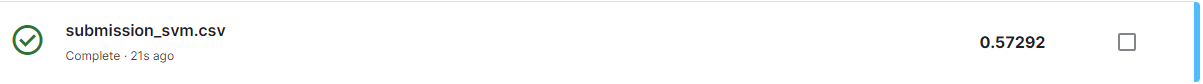

## random forest

In [ ]:
from sklearn import ensemble, preprocessing, metrics
forest = ensemble.RandomForestClassifier(n_estimators = 180)
forest_fit = forest.fit(train_df.drop(['label'], axis = 1),train_df['label'])

In [ ]:
predictions_forest = forest_fit.predict(x_test)

In [ ]:
len(predictions_forest)

8000

In [ ]:
predictions_forest = predictions_forest.tolist()

In [ ]:
submission_path = 'C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/sample_submission.csv'   
submission_df = pd.read_csv('C:/Users/Administrator/Desktop/台科/課程/112-2 社群分析/112-2 Social Media Analytics/hw1 Linkprediction/2024-ntust-practice-of-social-media-analytics-hw1/sample_submission.csv')
submission_df

,idx,ans
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
7995,7995,NaN
7996,7996,NaN
7997,7997,NaN
7998,7998,NaN


In [ ]:
submission_forest = pd.DataFrame({ 'idx': submission_df.idx.values, 'ans': predictions_forest })
submission_forest.to_csv("submission_forest.csv", index=False)

#### 0.61169

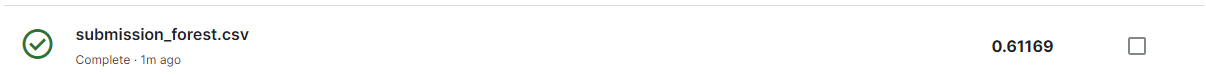

## xgboost

In [50]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型
xgboostModel = XGBClassifier(n_estimators=180, learning_rate= 0.03)
# 使用訓練資料訓練模型
xgboostModel.fit(train_df.drop(['label'], axis = 1),train_df['label'])
# 使用訓練資料預測分類
predictions_xgboost = xgboostModel.predict(x_test)

In [51]:
len(predictions_xgboost)

8000

In [52]:
predictions_xgboost = predictions_xgboost.tolist()

In [54]:
submission_xgboost = pd.DataFrame({ 'idx': submission_df.idx.values, 'ans': predictions_xgboost })
submission_xgboost.to_csv("submission_xgboost.csv", index=False)

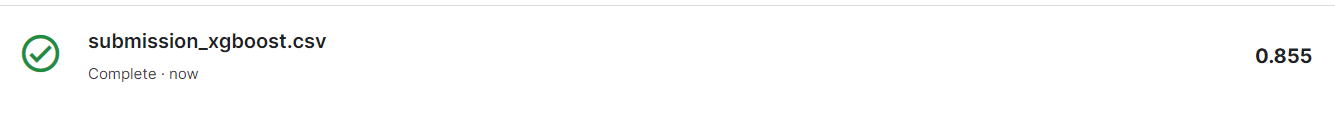